In [44]:
import numpy as np
import pandas as pd
import os
from gensim.models import Word2Vec
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tqdm import tqdm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

N=16153

%pwd

'/home/cseadmin/data/cys/TrafficFlowModel/data_process'

限制轨迹长度 @deprecated

---

In [2]:
walks=[]
walk_len=2
choices=100

n=0

for file in os.listdir("../data/taxi_after_proc/tracks"):
    df_track=pd.read_csv(f"../data/taxi_after_proc/tracks/{file}")
    arr_track=list(df_track["track"].dropna().astype("int32").astype("str").values)
    if len(arr_track)-1-walk_len<0:
            continue
    for _ in range(choices):
        start_index=random.randint(0, len(arr_track)-1-walk_len)
        walks.append(arr_track[start_index:start_index+walk_len])

In [3]:
len(walks)

11000

In [4]:
w2v_model=Word2Vec(walks, sg=1, hs=1, vector_size=128, window=2, min_count=1, workers=4)

w2v_model.save("./w2v_model_2.model")

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

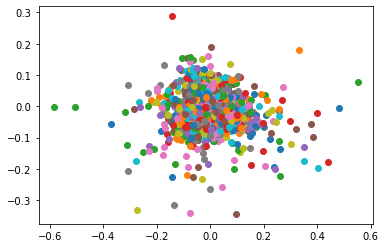

In [5]:

x = []
y = []
# node_vec={}

plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
for node in range(16153):
    try:
      vector = w2v_model.wv[str(node)]
    except KeyError:
      continue
    # print("%s:"%(str(node)), end="")
    # print(vector)
    x.append(vector[0])
    y.append(vector[1])
    # node_vec[str(node)] = vector
    # trash=ax.annotate(str(node), (vector[0], vector[1]))
   
for i in range(len(x)):
    trash=ax.scatter(x[i], y[i])

所有轨迹

---

In [55]:
walks_track=[]

for file in os.listdir("../data/taxi_after_proc/tracks"):
    df_track=pd.read_csv(f"../data/taxi_after_proc/tracks/{file}")
    arr_track=list(df_track["track"].dropna().astype("int32").astype("str").values)
    walks_track.append(arr_track)

In [56]:
w2v_model_track=Word2Vec(walks_track, sg=1, hs=1, vector_size=128, window=10, min_count=1, workers=4)

w2v_model_track.save("./w2v_model_track.model")

In [57]:
tsne_track=TSNE(n_components=2, init="pca", n_jobs=2)
vec2d_track=tsne_track.fit_transform(w2v_model_track.wv.get_normed_vectors()).T

KeyboardInterrupt: 

<Figure size 1800x1080 with 0 Axes>

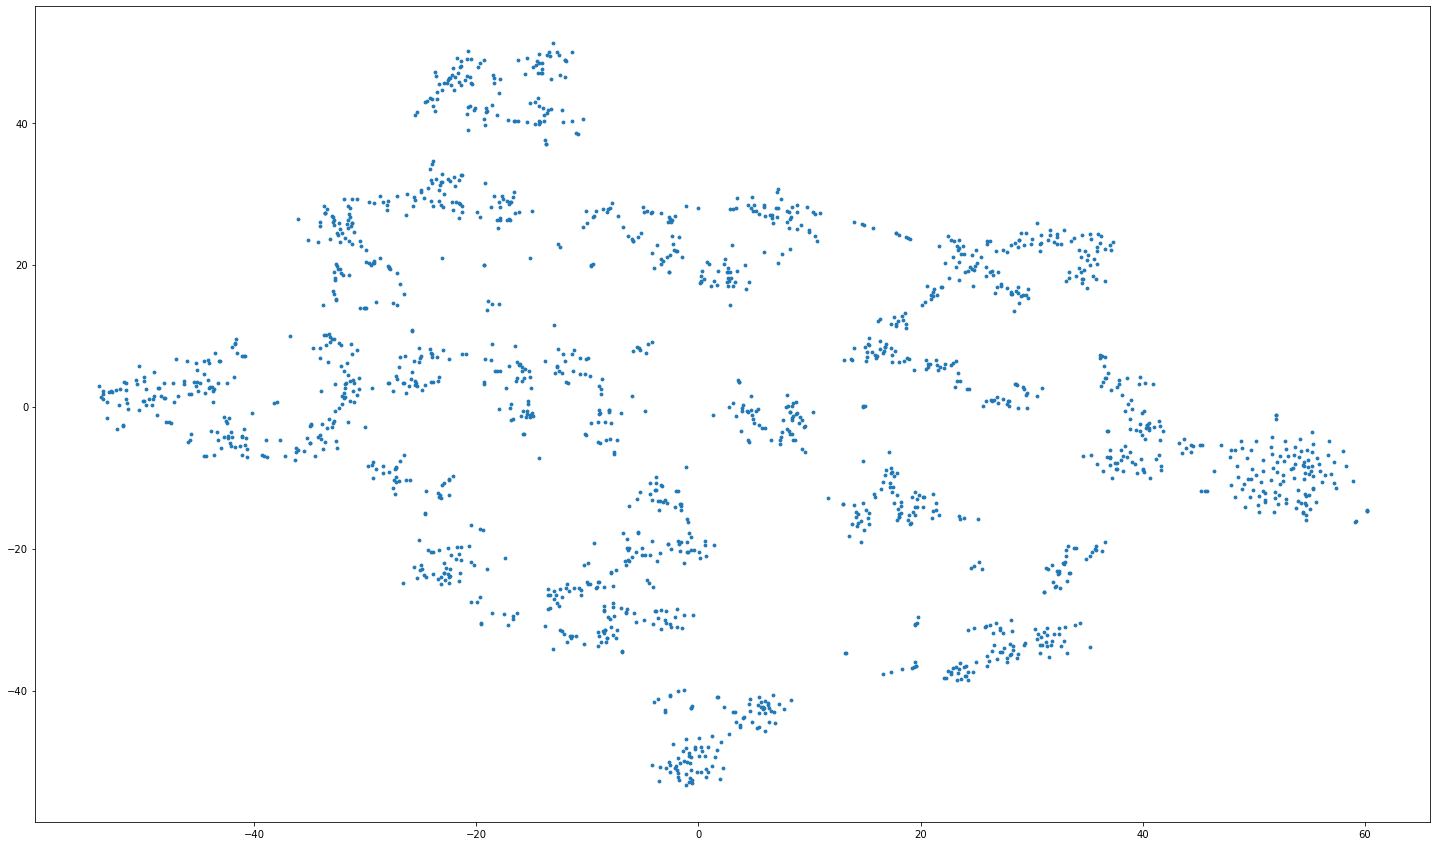

In [19]:
plt.figure(figsize=(25, 15))
plt.scatter(vec2d_track[0], vec2d_track[1], s=8)
plt.show()

In [67]:
w2v_model_track_window2=Word2Vec(walks_track, sg=1, hs=1, vector_size=128, window=2, min_count=1, workers=4)

w2v_model_track_window2.save("./w2v_model_track_window2.model")

重新计算转移矩阵

---

In [17]:
from tqdm import tqdm

trans_matrix_recalc=np.zeros((9, N, N), dtype=np.int32)

for file in tqdm(os.listdir("../data/taxi_after_proc/tracks")):
    df_track=pd.read_csv(f"../data/taxi_after_proc/tracks/{file}")
    track_list=df_track["track"].dropna().astype("int32").values
    time_list=df_track["time_seconds"].values
    for i in range(len(track_list)-1):
        trans_matrix_recalc[0][track_list[i]][track_list[i+1]]+=1
        trans_matrix_recalc[int(time_list[i]/10800)+1][track_list[i]][track_list[i+1]]+=1
        
np.count_nonzero(trans_matrix_recalc)

np.save("../data/trans_matrix_recalc.npy", trans_matrix_recalc)

100%|██████████| 123194/123194 [08:01<00:00, 255.99it/s]


5767609

In [19]:
np.count_nonzero(trans_matrix_recalc[0])

1810604

In [18]:
trans_matrix_test_recalc=np.zeros((9, N, N), dtype=np.int32)

for file in tqdm(os.listdir("../data/taxi_after_proc/tracks_test")):
    df_track=pd.read_csv(f"../data/taxi_after_proc/tracks_test/{file}")
    track_list=df_track["track"].dropna().astype("int32").values
    time_list=df_track["time_seconds"].values
    for i in range(len(track_list)-1):
        trans_matrix_test_recalc[0][track_list[i]][track_list[i+1]]+=1
        trans_matrix_test_recalc[int(time_list[i]/10800)+1][track_list[i]][track_list[i+1]]+=1
        
np.count_nonzero(trans_matrix_test_recalc)

np.save("../data/trans_matrix_test_recalc.npy", trans_matrix_test_recalc)

100%|██████████| 20331/20331 [01:57<00:00, 172.77it/s]


1805562

In [43]:
tm_0diag[0][11184][13698]
tm_0diag[0][11184][13277]
tm_0diag[0][11184][13276]
print()
trans_matrix_recalc[0][11184][13698]
trans_matrix_recalc[0][11184][13277]
trans_matrix_recalc[0][11184][13276]

3122

2617

1794

3122

2617

1794

---

---

---

验证

---

In [2]:
# tm_0diag=np.load("../data/trans_matrix.npy")

# for t in range(9):
#     for i in range(len(tm_0diag[t])):
#         tm_0diag[t][i][i]=0
        
# tm_test_0diag=np.load("../data/trans_matrix_test.npy")

# for t in range(9):
#     for i in range(len(tm_test_0diag[t])):
#         tm_test_0diag[t][i][i]=0
        
# np.count_nonzero(tm_0diag[0])
        
        
        
tm_recalc_0diag=np.load("../data/trans_matrix_recalc.npy")

for t in range(9):
    for i in range(len(tm_recalc_0diag[t])):
        tm_recalc_0diag[t][i][i]=0
        
tm_recalc_test_0diag=np.load("../data/trans_matrix_test_recalc.npy")

for t in range(9):
    for i in range(len(tm_recalc_test_0diag[t])):
        tm_recalc_test_0diag[t][i][i]=0
        
np.count_nonzero(tm_recalc_0diag[0])

1798816

In [3]:
w2v_model_track=Word2Vec.load("./w2v_model_track.model")

w2v_model_track.wv.most_similar("11184", topn=20)

np.argsort(-tm_recalc_0diag[0][11184])[:20]

[('13615', 0.9729341864585876),
 ('13614', 0.9695097208023071),
 ('13616', 0.956011950969696),
 ('13274', 0.9503890872001648),
 ('11182', 0.9433932304382324),
 ('13275', 0.9376606941223145),
 ('11185', 0.9175227284431458),
 ('12249', 0.916589617729187),
 ('12248', 0.8969387412071228),
 ('14064', 0.8888567686080933),
 ('12247', 0.8886268734931946),
 ('12246', 0.8814813494682312),
 ('12260', 0.8749760389328003),
 ('12259', 0.8435825705528259),
 ('12985', 0.8037405610084534),
 ('13265', 0.7896707653999329),
 ('13618', 0.7536085844039917),
 ('13617', 0.7491365671157837),
 ('12263', 0.7433364987373352),
 ('12258', 0.7424243092536926)]

array([13698, 13277, 13276, 11182, 13617, 13700,  9369,  9032, 13270,
       11212, 11179, 11185, 14653,  8019, 11177, 11181,  7980, 10939,
        8004, 10925])

In [6]:
tm_recalc_0diag[0][11184][13615]
tm_recalc_0diag[0][11184][13614]
tm_recalc_0diag[0][11184][13616]
tm_recalc_0diag[0][11184][13274]
tm_recalc_0diag[0][11184][11182]
print("---------------------")
tm_recalc_0diag[0][11184][13698]
tm_recalc_0diag[0][11184][13277]
tm_recalc_0diag[0][11184][13276]

w2v_model_track.wv.similarity("11184", "13698")
w2v_model_track.wv.similarity("11184", "13277")
w2v_model_track.wv.similarity("11184", "13276")

12

9

8

5

918

---------------------


3122

2617

1794

0.6456032

0.6081891

0.6844137

In [5]:
w2v_model_track_window2=Word2Vec.load("./w2v_model_track_window2.model")

w2v_model_track_window2.wv.most_similar("11184", topn=20)

np.argsort(-tm_recalc_0diag[0][11184])[:20]

[('13614', 0.9379023313522339),
 ('13615', 0.9356728196144104),
 ('11182', 0.9207170605659485),
 ('11185', 0.8991720676422119),
 ('13616', 0.8638279438018799),
 ('13617', 0.8098118305206299),
 ('11183', 0.7965940833091736),
 ('13274', 0.7937974333763123),
 ('13618', 0.7921343445777893),
 ('14064', 0.7813026309013367),
 ('13276', 0.7627720236778259),
 ('13275', 0.7314146161079407),
 ('13698', 0.7254093289375305),
 ('13700', 0.6700787544250488),
 ('12249', 0.6195049285888672),
 ('13277', 0.6174978613853455),
 ('4573', 0.6110345721244812),
 ('13270', 0.6080490350723267),
 ('13273', 0.6007676720619202),
 ('13266', 0.589728593826294)]

array([13698, 13277, 13276, 11182, 13617, 13700,  9369,  9032, 13270,
       11212, 11179, 11185, 14653,  8019, 11177, 11181,  7980, 10939,
        8004, 10925])

In [51]:
w2v_model_track_window2.wv.similarity("11184", "13698")
w2v_model_track_window2.wv.similarity("11184", "13277")
w2v_model_track_window2.wv.similarity("11184", "13276")

0.72540945

0.6174978

0.7627719

In [32]:
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions - targets)**2))

def mae(y_pred, y_true):
    return np.mean(np.abs((y_pred - y_true)))

def get_w2v_err_by_id(model, road_id:int):
    try:
        similar_list=model.wv.most_similar(str(road_id), topn=N)
    except KeyError:
        return [0, 0]
    
    model_row=np.zeros(N)
    for similar_tuple in similar_list:
        model_row[int(similar_tuple[0])]=similar_tuple[1]
        
    model_row_sum=np.sum(model_row)
    model_row=model_row/model_row_sum
    
    tm_row=tm_recalc_0diag[0][road_id]
    tm_row_sum=np.sum(tm_row)
    tm_row=tm_row/tm_row_sum
    
    return [rmse(model_row, tm_row), mae(model_row, tm_row)]

In [33]:
rmse_list=[]
mae_list=[]
for i in tqdm(range(N)):
    err=get_w2v_err_by_id(w2v_model_track, i)
    rmse_list.append(err[0])
    mae_list.append(err[1])
    

/tmp/ipykernel_58641/1914573207.py:22: RuntimeWarning: invalid value encountered in true_divide
  tm_row=tm_row/tm_row_sum


In [48]:
rmse_list=np.nan_to_num(rmse_list)
mae_list=np.nan_to_num(mae_list)

np.mean(rmse_list)
np.mean(mae_list)

sorted(rmse_list, reverse=True)
sorted(mae_list, reverse=True)

0.002678052127010326

0.00011791686606843424

[0.007867899350537224,
 0.007867851691412872,
 0.007867737211855835,
 0.007867726040126715,
 0.007867708102851395,
 0.007867704651163794,
 0.00786757996990715,
 0.007867535209182807,
 0.007867428042195384,
 0.007867422819014763,
 0.007867412781143019,
 0.00786740918358907,
 0.00786740373455367,
 0.00786738829700023,
 0.007867370580209322,
 0.00786734660960038,
 0.007867337125380479,
 0.007867306695609842,
 0.00786727609382571,
 0.007867260524448355,
 0.00786725354091238,
 0.007867223840678924,
 0.007867198837529343,
 0.007867165628233757,
 0.007867162198557957,
 0.007867158034715868,
 0.007867150497654699,
 0.007867140155884566,
 0.007867131568118945,
 0.007867124984157174,
 0.007867081174224397,
 0.00786707704092009,
 0.007867065751052865,
 0.007867061759773262,
 0.007867019766128915,
 0.007867012128037074,
 0.007866997059602145,
 0.007866992492494725,
 0.00786699199871111,
 0.00786696889461855,
 0.007866967795470317,
 0.007866965131226658,
 0.007866962393112138,
 0.007866952261800977

[0.00014829300447817336,
 0.00013644994933065122,
 0.00013450256052559108,
 0.00013270750814189984,
 0.00013230628158068014,
 0.00013138801024853967,
 0.000130087669264364,
 0.00013001980061393075,
 0.0001296763432808872,
 0.0001296729175949051,
 0.00012937643416080212,
 0.0001290840318923848,
 0.000129021073478105,
 0.00012839458252880245,
 0.00012828052198858082,
 0.0001282525827270691,
 0.00012810526282284679,
 0.00012802368708203054,
 0.00012794445984266048,
 0.00012776828230441978,
 0.00012752589547420276,
 0.00012751045638154768,
 0.00012748456864093702,
 0.0001274832367506163,
 0.00012746607216942255,
 0.00012742961401355308,
 0.00012739742668379004,
 0.00012729328810216894,
 0.00012719434488753375,
 0.00012718889990669452,
 0.00012704844146910375,
 0.0001269471243469053,
 0.0001269216794196869,
 0.00012691302477876073,
 0.00012685825477533636,
 0.00012677134650811958,
 0.00012674670838388119,
 0.00012673532288035285,
 0.000126733233475699,
 0.00012672812724201195,
 0.0001267175

In [45]:
rmse_list_window2=[]
mae_list_window2=[]
for i in tqdm(range(N)):
    err=get_w2v_err_by_id(w2v_model_track_window2, i)
    rmse_list_window2.append(err[0])
    mae_list_window2.append(err[1])

  0%|          | 46/16153 [00:01<06:56, 38.68it/s]/tmp/ipykernel_58641/1914573207.py:22: RuntimeWarning: invalid value encountered in true_divide
  tm_row=tm_row/tm_row_sum
100%|██████████| 16153/16153 [08:53<00:00, 30.27it/s]


In [47]:
rmse_list_window2=np.nan_to_num(rmse_list_window2)
mae_list_window2=np.nan_to_num(mae_list_window2)

np.mean(rmse_list_window2)
np.mean(mae_list_window2)

sorted(rmse_list_window2, reverse=True)
sorted(mae_list_window2, reverse=True)

0.002678287898992974

0.00011900992154955306

[0.007867577724450825,
 0.007867439166700359,
 0.007867437730120195,
 0.007867429537271308,
 0.007867402338433792,
 0.007867365597585706,
 0.007867347830565483,
 0.00786734714859461,
 0.007867334276443394,
 0.007867313478962665,
 0.007867307326663435,
 0.007867302309823656,
 0.007867277784073382,
 0.00786727214351593,
 0.007867270281422496,
 0.007867254023254831,
 0.007867243783773663,
 0.007867234486531363,
 0.007867233466510542,
 0.007867219927103498,
 0.00786720928160507,
 0.007867206005098765,
 0.007867205566557532,
 0.00786720248863342,
 0.007867190653080723,
 0.007867185572490498,
 0.007867184021189215,
 0.007867181646611349,
 0.007867180990131842,
 0.007867179033008312,
 0.007867173301204494,
 0.007867171709254984,
 0.007867170598324792,
 0.00786717003961867,
 0.007867166273423688,
 0.007867164792251467,
 0.007867164494599874,
 0.007867163648712847,
 0.007867162892389132,
 0.007867162571096906,
 0.007867144809074397,
 0.007867142582113292,
 0.007867140724219674,
 0.0078671405960

[0.00013087689409530657,
 0.00013029151166303498,
 0.00013026911065039024,
 0.00013026834223703985,
 0.00012988641497500204,
 0.0001296262328489425,
 0.00012955729676013196,
 0.00012931414545537572,
 0.00012870179454664248,
 0.00012845583505062747,
 0.00012841838247796726,
 0.000128417561232726,
 0.00012838817736277448,
 0.00012836131683033854,
 0.00012833091503681223,
 0.00012832464014768361,
 0.00012812717851763334,
 0.00012811106507154278,
 0.0001280145804089493,
 0.00012801451035978975,
 0.00012795598278648012,
 0.00012794407161947704,
 0.00012793221137734755,
 0.00012782451391672576,
 0.00012780565793075164,
 0.0001277387102028816,
 0.00012768908144469165,
 0.00012764595100977304,
 0.0001274535228148028,
 0.00012736402569201008,
 0.0001273610373592899,
 0.00012734606327634355,
 0.00012723201496738756,
 0.00012720986013235196,
 0.0001271337126745836,
 0.00012707917210821892,
 0.00012707296262554752,
 0.0001270675479786946,
 0.00012704844809531288,
 0.00012704589809053068,
 0.000127

In [49]:
np.save("./rmse_list_window2.npy", rmse_list_window2)
np.save("./mae_list_window2.npy", mae_list_window2)

np.save("./rmse_list.npy", rmse_list)
np.save("./mae_list.npy", mae_list)

画图

---

In [61]:
rmse_list=np.load("rmse_list.npy")
mae_list=np.load("mae_list.npy")

rmse_list_window2=np.load("rmse_list_window2.npy")
mae_list_window2=np.load("mae_list_window2.npy")

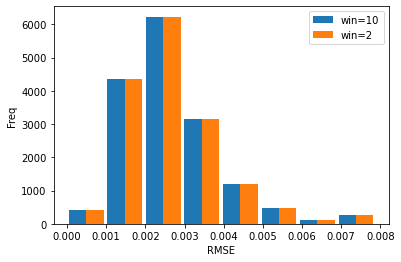

In [71]:
plt.hist([rmse_list, rmse_list_window2], bins=8, rwidth=0.9, label=["win=10", "win=2"])
plt.legend()
plt.xlabel("RMSE")
plt.ylabel("Freq")
plt.show();

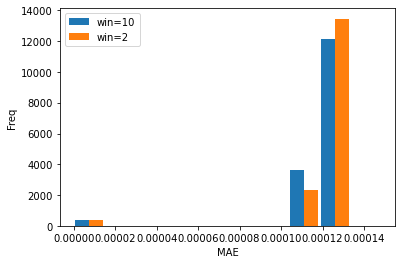

In [79]:
plt.hist([mae_list, mae_list_window2], bins=10, rwidth=0.9, label=["win=10", "win=2"])
plt.legend()
plt.xlabel("MAE")
plt.ylabel("Freq")
plt.show();

In [91]:
N

16153